In [121]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import joblib


In [122]:
df_train=pd.read_csv(r'C:\Users\vinay\OneDrive\Desktop\COMMENT_TRAIN.csv')
df_test=pd.read_csv(r'C:\Users\vinay\OneDrive\Desktop\COMMENT_DATA _TEST.csv')

In [123]:
df_train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [124]:
df_train.shape

(159571, 8)

In [125]:
# As it has alot of rows and it was not able to execute the code it was taking more than an hour ,so i am going to be working 
#on sample data out of the this dataset

df_train=df_train.sample(50000)

In [126]:
df_train.shape

(50000, 8)

In [89]:
df_test.shape

(153164, 2)

In [90]:
df_test=df_test.sample(50000)

In [86]:
# will drop the id column

df_train.drop(['id'],axis=1)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
150582,Please stop adding inappropriate external link...,0,0,0,0,0,0
128726,According to Microsoft DirectnumberD number ha...,0,0,0,0,0,0
103880,Yes of course take it to the ANI It just prove...,0,0,0,0,0,0
112704,Thanks for the offer but I think the admin are...,0,0,0,0,0,0
39017,Ok nevermind I guess I understand what the pro...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
86491,The other user posted as a source a book which...,0,0,0,0,0,0
57726,People who were killed in peleponnese had been...,0,0,0,0,0,0
143637,Paul August is wrong and I have to come back h...,0,0,0,0,0,0
41544,blatent hoax do you have any knowledge of the ...,0,0,0,0,0,0


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 150582 to 68858
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                50000 non-null  object
 1   comment_text      50000 non-null  object
 2   malignant         50000 non-null  int64 
 3   highly_malignant  50000 non-null  int64 
 4   rude              50000 non-null  int64 
 5   threat            50000 non-null  int64 
 6   abuse             50000 non-null  int64 
 7   loathe            50000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 4.4+ MB


In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 26615 to 39805
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  object
 1   comment_text  50000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [93]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [94]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.310745  0.676270  0.146415  0.655015   
highly_malignant   0.310745          1.000000  0.397758  0.123594  0.363588   
rude               0.676270          0.397758  1.000000  0.122921  0.747289   
threat             0.146415          0.123594  0.122921  1.000000  0.131842   
abuse              0.655015          0.363588  0.747289  0.131842  1.000000   
loathe             0.269760          0.201698  0.282881  0.103360  0.332015   

                    loathe  
malignant         0.269760  
highly_malignant  0.201698  
rude              0.282881  
threat            0.103360  
abuse             0.332015  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


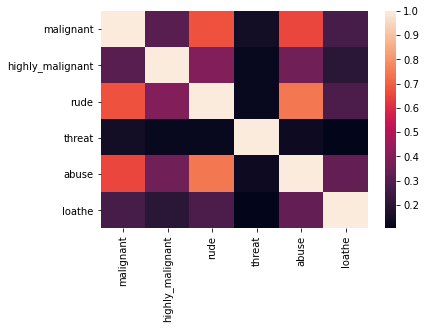

In [95]:
print(df_train.corr())               # checking the corrilation and heat map of train data 
print(sns.heatmap(df_train.corr()))

malignant
0    45265
1     4735
Name: malignant, dtype: int64


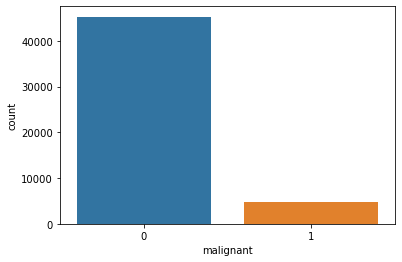

highly_malignant
0    49500
1      500
Name: highly_malignant, dtype: int64


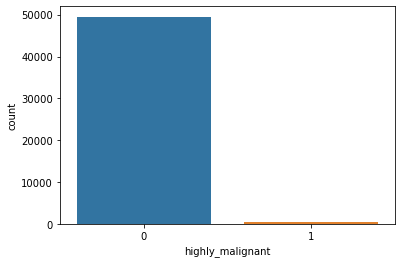

rude
0    47348
1     2652
Name: rude, dtype: int64


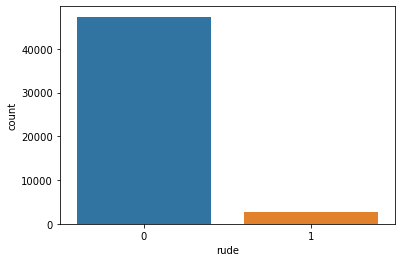

threat
0    49867
1      133
Name: threat, dtype: int64


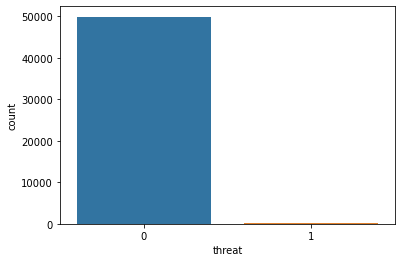

abuse
0    47479
1     2521
Name: abuse, dtype: int64


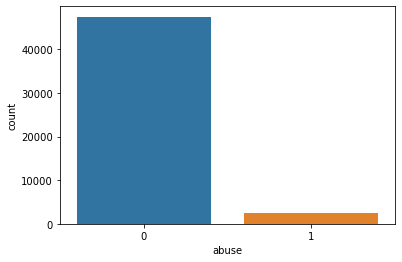

loathe
0    49561
1      439
Name: loathe, dtype: int64


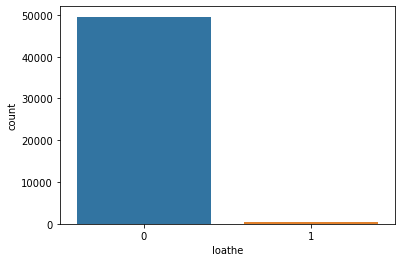

In [96]:
# checking the value counts and plotting the countplot 

col=['malignant',          
'highly_malignant',    
'rude',                
'threat',              
'abuse',               
'loathe']

for i in col:
    print(i)
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

In [97]:
# CLEANING THE TEXT 

In [113]:
# Replace email addresses with 'email'
df_train['comment_text'] =df_train ['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_train['comment_text'] = df_train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
df_train['comment_text'] = df_train['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [130]:
# ceaning the text for test data 

df_test['comment_text']=df_test['comment_text'].str.replace(r'^\s+/\s+?$','')

# Replace email addresses with 'email'
df_test['comment_text'] =df_test ['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_test['comment_text'] = df_test['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
df_test['comment_text'] = df_test['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [100]:
# checking bad words using wordcloud 

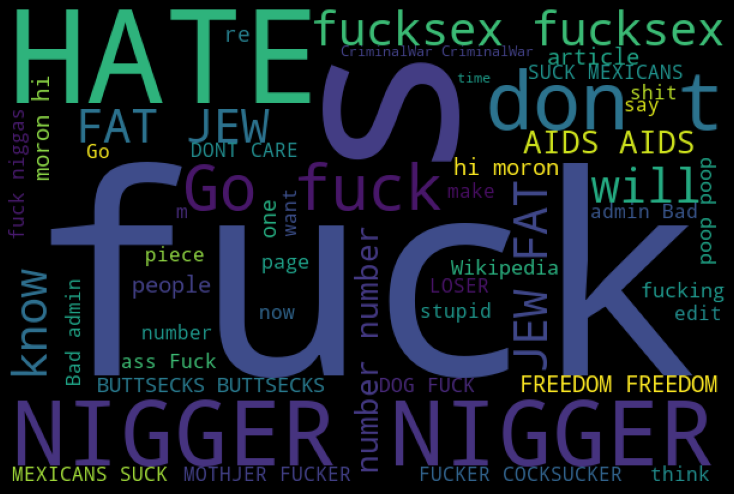

In [101]:
spams = df_train['comment_text'][df_train['malignant']==1]
word_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(spams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [142]:
# lemitizing the string  



lem = WordNetLemmatizer()
stemmer = PorterStemmer()

In [133]:
def conver_lower(text):
    return text.lower()

In [134]:
df_train['comment_text']=df_train['comment_text'].apply(conver_lower)

In [135]:
df_test['comment_text']=df_test['comment_text'].apply(conver_lower)

In [138]:
# removing stopwords

In [139]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
            
    y=x[:]
    x.clear()
    return y 

In [140]:
df_train['comment_text']=df_train['comment_text'].apply(remove_stopwords)

In [141]:
df_test['comment_text']=df_test['comment_text'].apply(remove_stopwords)

In [143]:
# lemmatize

def lemma(text):
    y=[]
    for i in text:
        y.append(lem.lemmatize(i))
    z=y[:]
    y.clear()
    return z



In [144]:
df_test['comment_text']=df_test['comment_text'].apply(lemma)

In [147]:
df_train['comment_text']=df_train['comment_text'].apply(lemma)

In [150]:
df_test['comment_text']

0         [yo, bitch, ja, rule, succesful, ever, whats, ...
1                                   [rfc, title, fine, imo]
2                           [source, zawe, ashton, lapland]
3         [look, back, source, information, updated, cor...
4                              [anonymously, edit, article]
                                ...                        
153159         [totally, agree, stuff, nothing, long, crap]
153160    [throw, field, home, plate, get, faster, throw...
153161    [okinotorishima, category, see, change, agree,...
153162    [one, founding, nation, eu, germany, law, retu...
153163    [stop, already, bullshit, welcome, fool, think...
Name: comment_text, Length: 153164, dtype: object

In [148]:
# joining back 

def join(list_input):
    return " ".join(list_input)

In [151]:
df_test['comment_text']=df_test['comment_text'].apply(join)

In [153]:
df_train['comment_text']=df_train['comment_text'].apply(join)

In [154]:
# dividing x and y 


x=df_train.drop(['malignant'],axis=1)

y=df_train['malignant']

In [155]:
tf_vec=TfidfVectorizer()

In [160]:
x=tf_vec.fit_transform(df_train['comment_text'])

In [161]:
naive=MultinomialNB()

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [163]:
naive.fit(x_train,y_train)

MultinomialNB()

In [164]:
y_pred=naive.predict(x_test)

In [165]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
accuracy_score(y_test,y_pred)*100

91.2